# Week 8 Practice

## Black-Scholes Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

###  European Options

Non-Dividend Paying Options

In [2]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [3]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'call')

12.335998930368717

In [4]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')

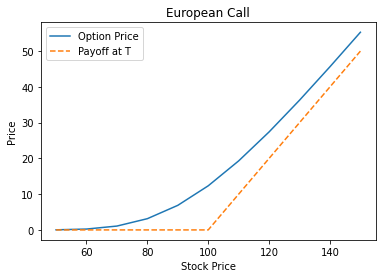

In [5]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

Dividend Paying Options

In [6]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [7]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [8]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

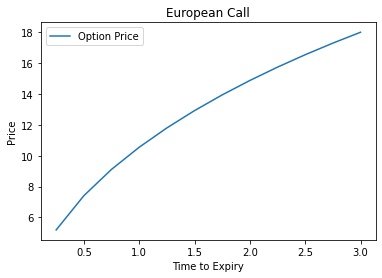

In [9]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

### Option Trading

Has Black Scholes correctly predicted the market value of the options?

In [10]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2020-12-11')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL201211C00060000,2020-11-05 18:26:10,60.0,58.40,0.0,0.0,0.0,0.0,NaN,0.0,0.000010,True,REGULAR,USD
1,AAPL201211C00065000,2020-11-03 15:47:47,65.0,45.95,0.0,0.0,0.0,0.0,NaN,0.0,0.000010,True,REGULAR,USD
2,AAPL201211C00070000,2020-11-02 20:08:38,70.0,38.01,0.0,0.0,0.0,0.0,NaN,40.0,0.000010,True,REGULAR,USD
3,AAPL201211C00075000,2020-11-05 14:59:35,75.0,43.90,0.0,0.0,0.0,0.0,1.0,0.0,0.000010,True,REGULAR,USD
4,AAPL201211C00080000,2020-11-05 18:26:51,80.0,38.30,0.0,0.0,0.0,0.0,NaN,2.0,0.000010,True,REGULAR,USD
5,AAPL201211C00085000,2020-11-05 19:43:30,85.0,34.20,0.0,0.0,0.0,0.0,1.0,1.0,0.000010,True,REGULAR,USD
6,AAPL201211C00090000,2020-11-04 16:12:57,90.0,24.23,0.0,0.0,0.0,0.0,104.0,0.0,0.000010,True,REGULAR,USD
7,AAPL201211C00095000,2020-11-04 14:31:45,95.0,19.40,0.0,0.0,0.0,0.0,NaN,44.0,0.000010,True,REGULAR,USD
8,AAPL201211C00096000,2020-11-03 14:37:18,96.0,14.75,0.0,0.0,0.0,0.0,NaN,1.0,0.000010,True,REGULAR,USD
9,AAPL201211C00097000,2020-11-06 14:30:00,97.0,21.00,0.0,0.0,0.0,0.0,1.0,1.0,0.000010,True,REGULAR,USD


In [11]:
data = yf.download("AAPL", start="2019-11-09", end="2020-11-08")

[*********************100%***********************]  1 of 1 completed


In [12]:
data['Adj Close']

Date
2019-11-11     64.460991
2019-11-12     64.401978
2019-11-13     65.019051
2019-11-14     64.569160
2019-11-15     65.336212
                 ...    
2020-11-02    108.582664
2020-11-03    110.249794
2020-11-04    114.752022
2020-11-05    118.824997
2020-11-06    118.690002
Name: Adj Close, Length: 251, dtype: float64

In [13]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 1/12
r = 0.0083
q = 0.0069
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.4627035580789311

In [14]:
AAPL_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [15]:
opt.calls['BSMPrice'] = pd.DataFrame(AAPL_bsm_call)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,AAPL201211C00060000,2020-11-05 18:26:10,60.0,58.40,0.0,0.0,0.0,0.0,NaN,0.0,0.000010,True,REGULAR,USD,58.663261
1,AAPL201211C00065000,2020-11-03 15:47:47,65.0,45.95,0.0,0.0,0.0,0.0,NaN,0.0,0.000010,True,REGULAR,USD,53.666726
2,AAPL201211C00070000,2020-11-02 20:08:38,70.0,38.01,0.0,0.0,0.0,0.0,NaN,40.0,0.000010,True,REGULAR,USD,48.670282
3,AAPL201211C00075000,2020-11-05 14:59:35,75.0,43.90,0.0,0.0,0.0,0.0,1.0,0.0,0.000010,True,REGULAR,USD,43.674573
4,AAPL201211C00080000,2020-11-05 18:26:51,80.0,38.30,0.0,0.0,0.0,0.0,NaN,2.0,0.000010,True,REGULAR,USD,38.682915
5,AAPL201211C00085000,2020-11-05 19:43:30,85.0,34.20,0.0,0.0,0.0,0.0,1.0,1.0,0.000010,True,REGULAR,USD,33.707335
6,AAPL201211C00090000,2020-11-04 16:12:57,90.0,24.23,0.0,0.0,0.0,0.0,104.0,0.0,0.000010,True,REGULAR,USD,28.780092
7,AAPL201211C00095000,2020-11-04 14:31:45,95.0,19.40,0.0,0.0,0.0,0.0,NaN,44.0,0.000010,True,REGULAR,USD,23.967333
8,AAPL201211C00096000,2020-11-03 14:37:18,96.0,14.75,0.0,0.0,0.0,0.0,NaN,1.0,0.000010,True,REGULAR,USD,23.027218
9,AAPL201211C00097000,2020-11-06 14:30:00,97.0,21.00,0.0,0.0,0.0,0.0,1.0,1.0,0.000010,True,REGULAR,USD,22.096862


In [16]:
opt.calls['estimate_error'] = ((opt.calls['lastPrice'] - opt.calls['BSMPrice'])/opt.calls['BSMPrice'])*100
opt.calls['estimate_error']

0      -0.448767
1     -14.378976
2     -21.903061
3       0.516151
4      -0.989882
5       1.461597
6     -15.809860
7     -19.056494
8     -35.945366
9      -4.963880
10    -18.781120
11    -42.278576
12     -6.058374
13      0.127571
14     -4.839300
15    -23.143088
16      0.108278
17     -0.007170
18     -2.901043
19     -5.415900
20     -7.554743
21     -7.998307
22     -5.939534
23     -7.851056
24    -12.268328
25     -8.239803
26    -13.237698
27    -14.423498
28    -16.772081
29    -18.053125
30    -17.585869
31    -21.117931
32    -23.105850
33    -24.879327
34    -32.017979
35    -33.551875
36    -33.482929
37    -39.067852
38    -37.376692
39    -41.467363
40    -46.711195
41    -49.582434
42    -53.378113
43    -52.966083
44    -63.513337
45    -63.170232
46    -55.306379
47    -44.101484
48    -28.819003
49     23.198445
50     92.450976
51    284.618106
Name: estimate_error, dtype: float64

In [17]:
opt.calls['estimate_error'].describe()

count     52.000000
mean     -13.230381
std       48.867098
min      -63.513337
25%      -34.150248
50%      -17.178975
75%       -5.302895
max      284.618106
Name: estimate_error, dtype: float64

Our mean estimation error is -13.23%, with a standard deviation of 48.86% points. Our median is even more promising at around -17.17%. Our standard deviation still seems a bit high.

Text(0.5, 1.0, 'Histogram of Estimate Error')

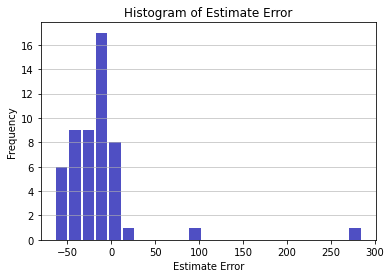

In [18]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

### Mibian - Options Pricing Library

MibianLib is an open source python library for options pricing. You can use it to calculate the price, the implied volatility, the greeks or the put/call parity of an option using the Black-Scholes(-Merton) pricing models.

In [19]:
pip install mibian

Note: you may need to restart the kernel to use updated packages.


In [20]:
import mibian as mb

In [21]:
option_100 = mb.BS([S, 100, r*100, 30], volatility = vol*100)

# Used for pricing European options on stocks without dividends 
# BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [22]:
option_100.callPrice

19.419392204809228

In [23]:
option_100d = mb.Me([S, 100, r*100, q*100, 30], volatility = vol*100)

# Used for pricing European options on stocks with dividends
# Me([underlyingPrice, strikePrice, interestRate, annualDividends, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [24]:
option_100d.callPrice

19.367609339143186

In [25]:
AAPL_mb_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_mb_bsm_call [i] = mb.Me([S, K[i], r*100, q*100, 30], volatility = vol*100).callPrice

In [26]:
opt.calls['MB_BSMPrice'] = pd.DataFrame(AAPL_mb_bsm_call)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error,MB_BSMPrice
0,AAPL201211C00060000,2020-11-05 18:26:10,60.0,58.40,0.0,0.0,0.0,0.0,NaN,0.0,0.000010,True,REGULAR,USD,58.663261,-0.448767,58.674221
1,AAPL201211C00065000,2020-11-03 15:47:47,65.0,45.95,0.0,0.0,0.0,0.0,NaN,0.0,0.000010,True,REGULAR,USD,53.666726,-14.378976,53.677638
2,AAPL201211C00070000,2020-11-02 20:08:38,70.0,38.01,0.0,0.0,0.0,0.0,NaN,40.0,0.000010,True,REGULAR,USD,48.670282,-21.903061,48.681134
3,AAPL201211C00075000,2020-11-05 14:59:35,75.0,43.90,0.0,0.0,0.0,0.0,1.0,0.0,0.000010,True,REGULAR,USD,43.674573,0.516151,43.685300
4,AAPL201211C00080000,2020-11-05 18:26:51,80.0,38.30,0.0,0.0,0.0,0.0,NaN,2.0,0.000010,True,REGULAR,USD,38.682915,-0.989882,38.693234
5,AAPL201211C00085000,2020-11-05 19:43:30,85.0,34.20,0.0,0.0,0.0,0.0,1.0,1.0,0.000010,True,REGULAR,USD,33.707335,1.461597,33.716432
6,AAPL201211C00090000,2020-11-04 16:12:57,90.0,24.23,0.0,0.0,0.0,0.0,104.0,0.0,0.000010,True,REGULAR,USD,28.780092,-15.809860,28.786264
7,AAPL201211C00095000,2020-11-04 14:31:45,95.0,19.40,0.0,0.0,0.0,0.0,NaN,44.0,0.000010,True,REGULAR,USD,23.967333,-19.056494,23.967983
8,AAPL201211C00096000,2020-11-03 14:37:18,96.0,14.75,0.0,0.0,0.0,0.0,NaN,1.0,0.000010,True,REGULAR,USD,23.027218,-35.945366,23.026414
9,AAPL201211C00097000,2020-11-06 14:30:00,97.0,21.00,0.0,0.0,0.0,0.0,1.0,1.0,0.000010,True,REGULAR,USD,22.096862,-4.963880,22.094491


In [27]:
opt.calls['estimate_error_mb'] = ((opt.calls['lastPrice'] - opt.calls['MB_BSMPrice'])/opt.calls['MB_BSMPrice'])*100
opt.calls['estimate_error_mb']

0      -0.467363
1     -14.396382
2     -21.920471
3       0.491471
4      -1.016287
5       1.434220
6     -15.827910
7     -19.058689
8     -35.943130
9      -4.953685
10    -18.765611
11    -42.262014
12     -6.026448
13      0.167241
14     -4.789840
15    -23.092472
16      0.189730
17      0.091415
18     -2.786822
19     -5.284826
20     -7.405430
21     -7.826699
22     -5.738536
23     -7.627058
24    -12.027263
25     -7.956421
26    -12.938099
27    -14.094653
28    -16.417729
29    -17.668113
30    -17.160183
31    -20.671565
32    -22.630721
33    -24.374027
34    -31.521613
35    -33.026672
36    -32.915257
37    -38.507739
38    -36.758063
39    -40.847339
40    -46.107163
41    -48.972109
42    -52.776514
43    -52.320299
44    -62.846403
45    -62.304401
46    -53.992522
47    -42.093918
48    -25.755995
49     29.446669
50    103.794261
51    310.647591
Name: estimate_error_mb, dtype: float64

In [28]:
opt.calls['estimate_error_mb'].describe()

count     52.000000
mean     -12.030997
std       52.411214
min      -62.846403
25%      -33.755787
50%      -16.788956
75%       -5.202041
max      310.647591
Name: estimate_error_mb, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

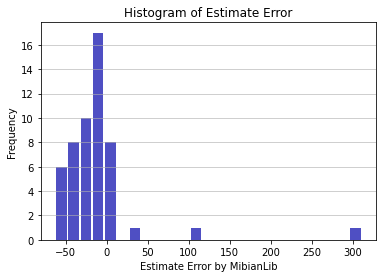

In [29]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error_mb'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error by MibianLib')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

Although the mean and median estimation of error have decreased, the standard deviation has increased. Overall, the results is consistent.